# Uso de los números aleatorios

## 1. Introducción al Módulo random

El módulo random de la librería estándar de Python incluye un conjunto de funciones que permiten obtener de distintos modos 
números pseudoaleatorios a través del algoritmo [Mersenne Twister](https://es.wikipedia.org/wiki/Mersenne_twister).

In [87]:
#importamos el módulo que vamos a usar 

import random   

Las funciones de los módulos se invocan con el formato: módulo.función().

En el módulo random existe la función random, que devuelve un número aleatorio que sigue una distribución uniforme. 

Así, para obtener $x \sim U(0,1)$:

In [ ]:
x = random.random()  #Cada ejecución dará un número distinto.
print(x)

Se puede usar algún bucle si se desea generar una secuencia $x_i \sim U(0,1)$ con $i = 1, 2, 3,..., N$:

In [ ]:
for i in range(10):
    print('%05.4f' % random.random(), end=' ')  #El código en rojo indica la cantidad de dígitos y de decimales a mostrar.
print()

In [ ]:
for i in range(10):
    print('%05.4f' % random.random(), sep="\t")
print()

La función seed() fija el valor de la semilla en la generación de la secuencia de números aleatorios. 
Esto es útil cuando se quieren utilizar los mismos datos de entrada en una simulación.

In [ ]:
random.seed(1) #primero fijamos la semilla

for i in range(20):
    print('%05.4f' % random.random(), end=' ')
print()

## Ejercicio 1: 
    a)Usar la función random() para simular 1 volado.
    b)Usar la función random() para simular 1000 volados.
    c)Determinar de b) la probabilidad de que ocurra "sol" en un volado. 

In [89]:
#usar la función random() para simular  volado
def volado():
    x=random.random()
    if x <= 0.5:
        moneda = "aguila"
    else:
        moneda = "sol"
    return moneda

In [90]:
print(volado())

sol


In [91]:
#Usar la función random() para simular 100 volado
aguila= 0
sol= 0
for i in range (1000): 
  x= random.random()
  if x<= 0.5:
    aguila +=1
  else:
    sol +=1

print("han salido", aguila,"Aguilas y", sol,"soles")

han salido 496 Aguilas y 504 soles


In [92]:
#Determinar la probabilida de que salga sol 
prob=sol/1000 
print("La probabilidad de caer sol es ", prob)

La probabilidad de caer sol es  0.504


La función uniform() devuelve un número float incluido entre los valores indicados.

In [49]:
for i in range(10):
    print('%1.0f' %random.uniform(1, 50), end=' ')
print()

23 40 5 27 5 16 9 37 35 36 


La función randint() devuelve un número entero incluido entre los valores indicados. 
Los valores de los límites inferior y superior también pueden aparecer entre los valores devueltos.

In [95]:
def sorteo():
  x=random.randint(0,5)
  if x <= 1:
    color = "blanco"
  
  elif x <= 2:
    color = "negro"

  elif x <= 3:
    color = "rojo"

  elif x <= 4:
    color = "azul"

  elif x <= 5:
    color ="verde"

  return color

print(sorteo())


azul


## Ejercicio 2:
    a) Simular un sorteo de los colores blanco, negro, rojo, azul y verde.
    b) Simular 5 sorteos con sustitución.

In [96]:
#Simular un sorteo de los colores blanco, rojo, negro, azul y verde
def sorteo():
  x=random.randint(0,5)
  if x <= 1:
    color = "blanco"
  
  elif x <= 2:
    color = "negro"

  elif x <= 3:
    color = "rojo"

  elif x <= 4:
    color = "azul"

  elif x <= 5:
    color ="verde"

  return color

print(sorteo())


rojo


In [77]:
#Simular 5 sorteos con sustitución.
l = []
cuenta = 0
nr = 5
for i in range(nr):
    x = sorteo()
    l.append(x)
print(l)

['blanco', 'azul', 'blanco', 'azul', 'blanco']


La función randrange() devuelve enteros que van desde un valor inicial a otro final 
separados entre sí un número de valores determinados.

In [ ]:
for i in range(20):
    print(random.randrange(0, 20, 3), end=' ')
print()

# 2. Estimación del número $\pi$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x = np.linspace(0, 1, 100)
y = np.sqrt(1 - x**2)               # Ecuación del círculo en el primer cuadrante 


x_1 = random.random()
y_1 = random.random()

fig = plt.figure(1, figsize=(8, 8))        # Aquí fijamos el formato de la gráfica para que sea cuadrada.
plt.plot(x, y, color="red", markersize=1) 
plt.scatter(x_1, y_1, s=20, c="blue")
plt.title("Estimación de $\pi$")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

# Tarea 1. 
    Estimar el valor de pi usando la función random

In [99]:
cuenta=0
nr=100000000 #conforme este numero crezca la aproximación sera mejor
for i in range(nr):
    x=random.random()
    y=random.random()
    if x**2+y**2<1: #usando la ecuación de una circunferencia
        cuenta=cuenta+1 
print(4*cuenta/nr)

3.14159704


## La aproximación analítica

Partamos de la ecuación:

##     $\pi = 4\arctan 1$

y usemos la aproximación de Taylor para expandir en una serie de potencias.

Recordar:

$f(x) = f(0) + f´(x)x + \frac{1}{2}f´´(0)x^2 + ...$

$Si f(x) = \arctan x$ entonces:

$f´(x) = \frac{d \arctan x}{dx} = \frac{1}{1 + x^2} \rightarrow f´(0) = 1$

$f´´(x) = \frac{d^2 \arctan x}{d^2x} = - \frac{2x}{(1 + x^2)^2} \rightarrow f´´(0) = 0$

...

$f^{2i + 1}(x) = (-1)^{i} \frac{(2i)!}{(1 + x^2)^{2i + 1}} \rightarrow f^{2i + 1}(0) = (-1)(2i)!$

$f^{2i}(x) = 0$

Entonces:

$\arctan x = \sum_{i = 0} (-1)^{i} \frac{x^{2i + 1}}{2i + 1}$

Por tanto:

## $\pi = \sum_{i = 0} (-1)^{i} \frac{4}{2i + 1}$

In [ ]:
def pi_taylor(n):
    pi = 0
    for i in range(n):
        pi = pi + 4.0/(2*i+1)*(-1)**i
        print(i, pi)

In [ ]:
pi_taylor(10)

In [ ]:
def pi_Taylor(n):
    pi = 0
    L =[]
    for i in range(n):
        pi = pi + 4.0/(2*i+1)*(-1)**i
        L.append(pi)
    fig = plt.figure(1, figsize=(8, 8))        
    plt.plot(L, color="red", markersize=1)
    plt.xlabel("Iteraciones")
    plt.ylabel("Estimación")
    plt.grid()
    plt.show()

In [ ]:
pi_Taylor(200)

## Ejercicio 3:

Graficar las salidas obtenidas en la Tarea 1

In [81]:
import matplotlib.pyplot as plt
import numpy as np
cuenta=0
pi=0
nr=2000 #conforme este numero crezca la aproximación sera mejor
lx=[]
ly=[]
for i in range(nr):
    x=random.random()
    y=random.random()
    if x**2+y**2<1: #usando la ecuación de una circunferencia
        cuenta=cuenta+1 
    i=i+1
    pi = 4*cuenta/i
    lx.append(i)
    ly.append(pi)
print(i, pi)
fig = plt.figure(1, figsize=(8, 8))
plt.plot(lx,ly, color="red", markersize=1)
plt.xlabel('Número de dardos')
plt.ylabel('Valor de PI aproximado')
plt.grid()
plt.show()

AttributeError: ignored

## Continuamos

In [ ]:
x = np.linspace(0, 1, 100)
y = np.sqrt(1 - x**2)               # Ecuación del círculo en el primer cuadrante 


x_1 = random.random()
y_1 = random.random()

fig = plt.figure(1, figsize=(8, 8))        # Aquí fijamos el formato de la gráfica para que sea cuadrada.
plt.plot(x, y, color="red", markersize=1) 
plt.scatter(x_1, y_1, s=20, c="blue")
plt.title("Estimación de $\pi$")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [ ]:
def pi_mc(n):
    pi = 0
    counter = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <1:
            counter = counter + 1
        pi = 4.0*float(counter)/(i + 1)
        print(i, pi)

In [ ]:
pi_mc(10)

In [ ]:
def pi_mc(n):
    pi = 0
    lx = []
    ly = []
    counter = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <1:
            counter = counter + 1
            lx.append(counter)
            ly.append(4.0*float(counter)/(i + 1))
        
        pi = 4.0*float(counter)/(i + 1)
        
        e = np.absolute((pi - np.pi)/np.pi)
    print("pi =", pi)
    print("error =", e)
    
    fig = plt.figure(1, figsize=(8, 8))        
    plt.xlabel("Iteraciones")
    plt.ylabel("Estimación de $\pi$")
    plt.grid()
    plt.plot(lx, ly, color="blue", markersize=1)
    plt.show()

In [ ]:
pi_mc(1000)

Si se tiene, para cada punto aleatorio:
    
$X_i = 1$ si cae dentro del circulo y

$X_i = 0$ si cae fuera

## Ejercicio 4:

a) Calcular $E[X_i]$ y $V[X_i]$




Para el experimento de simulación, definimos $Z_N = \frac{X_1 + X_2 + ... + X_N}{N}$

In [100]:
from statistics import mean, variance
def pi_mc(n):
    pi = 0
    lx = []
    ly = []
    counter = 0
    xi = 0
    Z = []
    for i in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <1:
            counter = counter + 1
            lx.append(counter)
            ly.append(4.0*float(counter)/(i + 1))
            xi = 1
            Z.append(xi) #Se añade el valor de xi = 1
        else:
            xi = 0
            Z.append(xi) #Se añade el valor de xi = 0
        pi = 4.0*float(counter)/(i + 1)
        e = np.absolute((pi - np.pi)/np.pi)
        
    media = mean(Z) #Obtenemos la media de la V.A xi
    p=np.pi/4
    errorE = np.absolute((media - (p))/(p)) 
    varianza = variance(Z)
    errorV = np.absolute((varianza - ((p)*(1-p)))/(p))
    print("pi =", pi)
    print("error =", e)
    print("Valor esperado obtenido mediante simulación", media,"Error en el calculo de la esperanza", errorE)
    print("Valor de la varianza por simulación", varianza, "Error respecto al valor real", errorV)
    
    fig = plt.figure(1, figsize=(8, 8))        
    plt.xlabel("Iteraciones")
    plt.ylabel("Estimación de $\pi$")
    plt.grid()
    plt.plot(lx, ly, color="blue", markersize=1)
    plt.show()

pi = 3.1388
error = 0.000888929246317861
Valor esperado obtenido mediante simulación 0.7847 Error en el calculo de la esperanza 0.000888929246317861
Valor de la varianza por simulación 0.16896280628062807 Error respecto al valor real 0.0005282899433706685


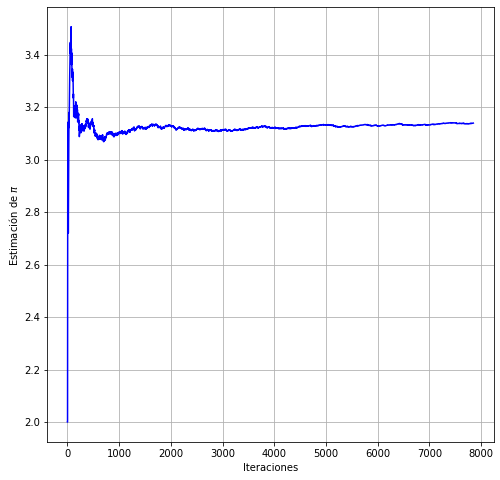

In [101]:
pi_mc(10000)

## Ejercicio 5:
a) Calcular  $E[Z_N]$ y $V[Z_N]$
b) ¿Cuál debe ser el valor de $N$ para que el error sea de 0.01?

Sea $Z_n = \frac{x_1+x_2+.....+x_n}{N} $ para todo el circulo, si usamos un cuarto del circulo en tonces necesitamos que:
$$z_n =4 \frac{x_1+x_2+...+x_n}{N}$$
Enonces la esperanza será: \\
$$\mathbb{E}\left [ Z_n \right ]=\mathbb{E}\left [ 4\frac{x_1+x_2+..+x_n}{n} \right ] = \frac{4}{n}\mathbb{E}\left [ x_1+x_2+..+x_n \right ]=\frac{4}{n} \mathbb{E}\left [ x_1\right ]+\mathbb{E}\left [ x_2\right ] +...+\mathbb{E}\left [ x_n\right ]$$
$$=\frac{4}{n}\left [ N \mathbb{E}\left [ x_i \right ] \right ] $$
$$=\pi$$



$$\mathbb{V}\left [ Z_n \right ] = ( \frac{4}{N})^2 \left [ N V|z_n \right ] $$
$$=\frac{16}{N^2}[N(\frac{\pi}{4} - \frac{\pi^2}{16})]$$
$$=\frac{16}{N}[\frac{\pi}{4}(1-\frac{\pi}{4}]$$


In [ ]:
pi_mc(26967)

# Integrales

In [ ]:
def riemannplot(f, a, b, ra, rb, n):
    # f es la función 
    # a y b son los limites del eje x para graficar la funcion f
    # ra y rb son los limites del intervalo en el eje x del que queremos calcular la suma
    # n es el numero de rectangulos que calcularemos

    atenuacion = (b-a)/100
    x = np.arange(a, b+atenuacion, atenuacion)
    
    plt.plot(x, f(x), color='red')

    delta_x = (rb-ra)/n
    riemannx = np.arange(ra, rb, delta_x)
    riemanny = f(riemannx)
    riemann_sum = sum(riemanny*delta_x)

    plt.bar(riemannx,riemanny,width=delta_x,alpha=0.5,edgecolor = 'black',facecolor='green')
   
    plt.xlabel('x')
    plt.ylabel('f(x)')
    
    plt.title('Suma de Riemann por la izquierda de f(x)')
    plt.figtext(0.1,-0.05, "Suma de Riemann: %.5f " %(riemann_sum), color='b')
    plt.savefig('riemann.png')
    plt.show()

In [ ]:
def f(x):
    return np.sqrt(np.arctan(x))

In [ ]:
riemannplot(f, 0, 1.001, 0, 1.001, 20)